# Comparison Sorting

*Classification of sorting algorithms:*

* Time Complexity
* Space Complexity (in-place, or auxiliary memory)
* Stability (preserves original order in case of duplicates)
* Recursive vs non-recursive

In [1]:
import time
import random

In [2]:
def test_sort(func):
    test_suite = []
    for exp in range(5):
        numel = 10 ** exp
        test_suite.append([random.randint(1, 1_000_000) for _ in range(numel)])
    
    start_time = time.time()
    for test in test_suite:
        assert sorted(test) == func(test)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    print("All tests passed!", "\nElapsed time: ", elapsed_time)

## 1. Selection Sort

**Algorithm:** The algorithm divides the input list into two parts: a sorted sublist of items which is built up from left to right at the front (left) of the list and a sublist of the remaining unsorted items that occupy the rest of the list. Initially, the sorted sublist is empty and the unsorted sublist is the entire input list. The algorithm proceeds by finding the smallest (or largest, depending on sorting order) element in the unsorted sublist, exchanging (swapping) it with the leftmost unsorted element (putting it in sorted order), and moving the sublist boundaries one element to the right.

![anim.gif](https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif)

In [3]:
def selection_sort(A):
    A = A.copy()
    
    for i in range(len(A) - 1):
        _min = (A[i], i)

        for j in range(i + 1, len(A)):
            if A[j] < _min[0]:
                _min = (A[j], j)

        A[i], A[_min[1]] = A[_min[1]], A[i]
        
    return A

In [4]:
test_sort(selection_sort)

All tests passed! 
Elapsed time:  8.336252927780151


    Time Complexity: O(n^2)
    Space Complexity: O(1)
    Stability: No
    Non-recursive

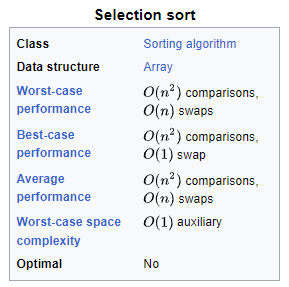

## 2. Bubble Sort

**Algorithm:** Bubble sort, sometimes referred to as sinking sort, is a simple sorting algorithm that repeatedly steps through the input list element by element, comparing the current element with the one after it, swapping their values if needed. These passes through the list are repeated until no swaps had to be performed during a pass, meaning that the list has become fully sorted.

![anim.gif](https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif)

In [13]:
def bubble_sort(A):
    A = A.copy()
    
    for k in range(len(A) - 1):  
        # a maximum of n - 1 passes will be required for n - 1 heaviest elements to reach the top
        for i in range(len(A) - k - 1):
            if A[i] > A[i + 1]:
                A[i], A[i + 1] = A[i + 1], A[i]
                
    return A

In [14]:
test_sort(bubble_sort)

All tests passed! 
Elapsed time:  19.773722410202026


In [21]:
def bubble_sort_opt(A):
    A = A.copy()
    
    for k in range(len(A) - 1):
        swaps = False  # optimisation = stop when no more swaps were performed
        
        for i in range(len(A) - k - 1):
            if A[i] > A[i + 1]:
                A[i], A[i + 1] = A[i + 1], A[i]
                swaps = True
                
        if not swaps:
            return A
                
    return A

In [16]:
test_sort(bubble_sort_opt)

All tests passed! 
Elapsed time:  21.542867422103882


In [19]:
A = list(range(10_000))

In [22]:
%%timeit -n 2 -r 1
bubble_sort(A);

10.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


In [23]:
%%timeit -n 2 -r 1
bubble_sort_opt(A);

2.15 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


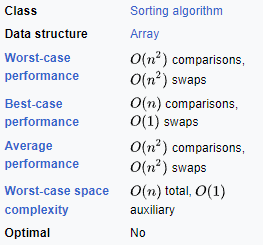

Bubble sort is a stable sort algorithm, like insertion sort.

## 3. Insertion Sort

**Algorithm:** Maintain two partial lists, one ordered and another unordered. Loop through the unordered list and insert into the sorted list while maintaining sorted behavior.

![anim.gif](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

In [38]:
def insertion_sort(A):
    A = A.copy()
    
    for i in range(1, len(A)):
        element = A[i]
        
        # keep shifting elements by 1 till you find the appropriate place, then plant your element
        j = i - 1
        while j >= 0 and A[j] > element:
            A[j + 1] = A[j]
            j -= 1
            
        A[j + 1] = element
        
    return A

In [39]:
a = [random.randint(0, 10) for _ in range(10)]; a

[1, 8, 7, 6, 6, 4, 7, 0, 10, 2]

In [41]:
test_sort(insertion_sort)

All tests passed! 
Elapsed time:  11.755180358886719


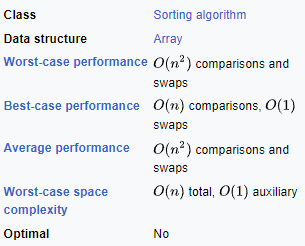

However, insertion sort provides several advantages:

* Simple implementation: Jon Bentley shows a three-line C/C++ version that is five lines when optimized.[1]
* Efficient for (quite) small data sets, much like other quadratic (i.e., O(n2)) sorting algorithms
* **More efficient in practice than most other simple quadratic algorithms such as selection sort or bubble sort**
* Adaptive, i.e., efficient for data sets that are already substantially sorted: the time complexity is O(kn) when each element in the input is no more than k places away from its sorted position
* **Stable**; i.e., does not change the relative order of elements with equal keys
* **In-place**; i.e., only requires a constant amount O(1) of additional memory space
* **Online; i.e., can sort a list as it receives it**

## 4. Merge Sort - D&Q

**Algorithm:** Conceptually, a merge sort works as follows:

1. Divide the unsorted list into n sublists, each containing one element (a list of one element is considered sorted).
2. Repeatedly merge sublists to produce new sorted sublists until there is only one sublist remaining. This will be the sorted list.

![illustration.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Merge_sort_algorithm_diagram.svg/300px-Merge_sort_algorithm_diagram.svg.png)

In [61]:
def merge(s1, s2):
    if not s1: return s2
    if not s2: return s1
    
    answer = []
    
    l = r = 0
    
    while l < len(s1) and r < len(s2):
        if s1[l] < s2[r]:
            answer.append(s1[l])
            l += 1
            
        else:
            answer.append(s2[r])
            r += 1
            
    if l != len(s1):
        answer.extend(s1[l:])
    elif r != len(s2):
        answer.extend(s2[r:])
        
    return answer

def merge_sort(A):
    if len(A) < 2:
        return A
    
    mid = len(A) // 2
    L = merge_sort(A[:mid])
    R = merge_sort(A[mid:])
    return merge(L, R)

In [ ]:
a1 = sorted([random.randint(0, 10) for _ in range(5)])
a2 = sorted([random.randint(0, 10) for _ in range(8)])

In [64]:
test_sort(merge_sort)

All tests passed! 
Elapsed time:  0.12299323081970215


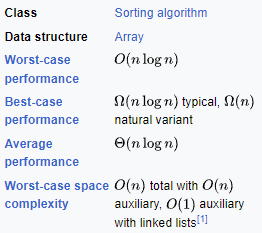

It is a **stable sort.**

**Con**: Not in-place, hence takes theta(n) extra memory

## 5. Quick Sort - D&Q

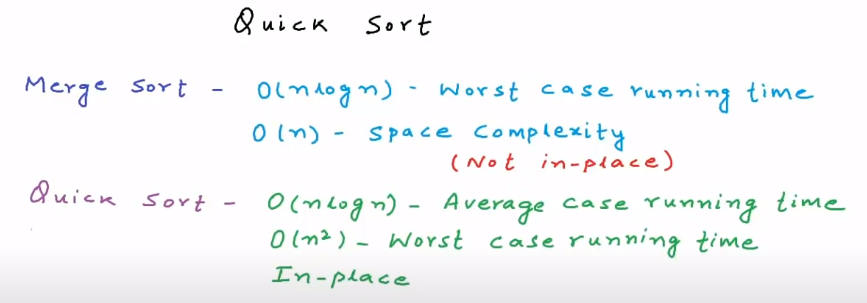

**Algorithm:**  It works by selecting a `pivot` element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the `pivot`. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.

### Main Idea

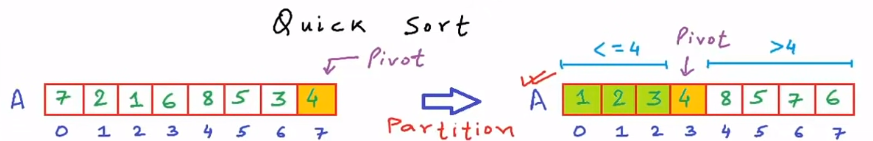

### Partitioning Logic

This article from Khan Academy clearly explains the partitioning algorithm. For an implementation, have a look at the video below. Note that the variable `p` is the start of the subarray so we only need to maintain an intermediate pointer `q`.

https://www.khanacademy.org/computing/computer-science/algorithms/quick-sort/a/linear-time-partitioning

> The idea is to maintain three partitions - L (less), G (greater), U (unknown). Iterate through the array till the pivot, and then reduce U so that every element is either in G or L. 

We use just one pointer `boundary` to track the start of the G partition.

In [67]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/COk73cpQbFQ?si=3e2zHIzb57iAs-il&amp;start=879"></iframe>

### Implementation

In [91]:
def partition(A, start, end):
    if start >= end: 
        return None
    
    pivot = end
    
    boundary = start
    
    for j in range(start, end):
        if A[j] < A[pivot]:
            A[boundary], A[j] = A[j], A[boundary]
            boundary += 1
            
    A[boundary], A[pivot] = A[pivot], A[boundary]
    
    return boundary

In [87]:
a = [random.randint(0, 20) for _ in range(10)]; a

[2, 14, 3, 17, 12, 14, 18, 17, 3, 10]

In [88]:
partition(a, 0, len(a) - 1); a

[2, 3, 3, 10, 12, 14, 18, 17, 14, 17]

In [92]:
def _quick_sort(A, start, end):
    if start >= end:
        return A
    
    pivot_ix = partition(A, start, end)
    _quick_sort(A, start, pivot_ix-1)
    _quick_sort(A, pivot_ix+1, end)
    
    return A

def quick_sort(A):
    return _quick_sort(A, 0, len(A) - 1)

In [97]:
test_sort(quick_sort)

All tests passed! 
Elapsed time:  0.07536172866821289


## TODO

* Plots
* Bucket and radix sort
* Parallel merge sort